Professor, não encontrei as implementações em OpenCv do perceptron que o senhor mencionou no documento word da explicação do tema. No entanto, ao pesquisar por outras bibliotecas, achei um tutorial muito simples no link: https://medium.com/@nazanindelam/single-layer-artificial-neural-networks-a91cf3752a86. Segui o tutorial para a implementação, e comentei algumas partes que achei necessário.

In [6]:
import numpy as np

In [7]:
class Perceptron(object):
    def __init__(self, eta=0.01, epocas=50):
        self.eta = eta
        self.epocas = epocas
    
    def train(self, X, y):
        self.w_ = np.zeros(1+ X.shape[1])
        self.errors_ = []
        
        for _ in range(self.epocas):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0 , 1 , -1)

In [8]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [25]:
df.head(10)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [20]:
#Utilizando só os 100 primeiros dados
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1) #O y representa o resultado correto que o modelo deve encontrar. Um processamento nessa coluna 4, é realizado a fim de torná-la numérica, onde quando possui valor 'Iris-setosa', seu valor será substituido por -1, e quando não for terá valor 1.

X = df.iloc[0:100, [0,2]].values #Caracteristicas que o modelo vai analisar

In [21]:
print(X)
print(y)

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4.4]

Weigths:  [-0.4  -0.68  1.82]


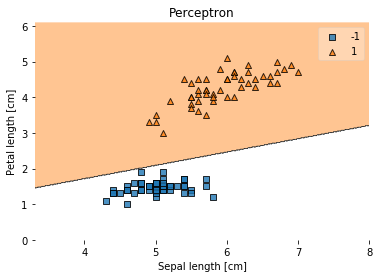

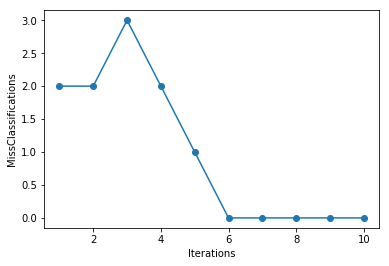

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

perceptron = Perceptron(epocas = 10, eta=0.1)

perceptron.train(X,y)
print('Weigths: ', perceptron.w_)
plot_decision_regions(X,y, clf=perceptron)
plt.title('Perceptron')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.show()

plt.plot(range(1, len(perceptron.errors_) + 1), perceptron.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('MissClassifications')
plt.show()
